### Prática dos conceitos básicos de Python para análise de dados.


In [30]:
# Manipulação dos dados: funções sum(), min(), max(), count(), average(), groupby
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [31]:
database = pd.read_csv('/Users/felipe.manso/Desktop/Arquivos_análises/dados_consumo_streaming.csv')

In [32]:
database.describe()

,id_usuario,tempo_assinatura,tempo_visualizacao,avaliacao_conteudo
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,11.963000,117.665000,3.702000
std,288.819436,5.732407,40.578978,1.068802
min,1.000000,1.000000,10.000000,1.000000
25%,250.750000,8.000000,90.000000,3.000000
50%,500.500000,12.000000,117.500000,4.000000
75%,750.250000,16.000000,146.000000,4.000000
max,1000.000000,30.000000,239.000000,5.000000


In [33]:
database['id_usuario']

0         1
1         2
2         3
3         4
4         5
       ... 
995     996
996     997
997     998
998     999
999    1000
Name: id_usuario, Length: 1000, dtype: int64

In [34]:
#classificacao da correlacao de spearman(ranks)

database['rank_tempo_assinatura'] = database['tempo_assinatura'].rank()
database['rank_avaliacao_conteudo'] = database['avaliacao_conteudo'].rank()
print(database['rank_tempo_assinatura'])
print(database['rank_avaliacao_conteudo'])

0      382.0
1      511.5
2      382.0
3       51.0
4      885.0
       ...  
995     66.0
996    707.0
997    758.0
998    258.0
999    382.0
Name: rank_tempo_assinatura, Length: 1000, dtype: float64
0      556.0
1      556.0
2       94.0
3      241.0
4       94.0
       ...  
995    556.0
996    556.0
997    556.0
998    885.0
999     94.0
Name: rank_avaliacao_conteudo, Length: 1000, dtype: float64


In [35]:
coef_spearman, p_valor = spearmanr(database['tempo_assinatura'],database['avaliacao_conteudo'])
print(f"Coeficiente de Spearman:{coef_spearman:.3f}")
print(f"P-value: {p_valor:.3f}")

Coeficiente de Spearman:0.004
P-value: 0.901


<function matplotlib.pyplot.show(close=None, block=None)>

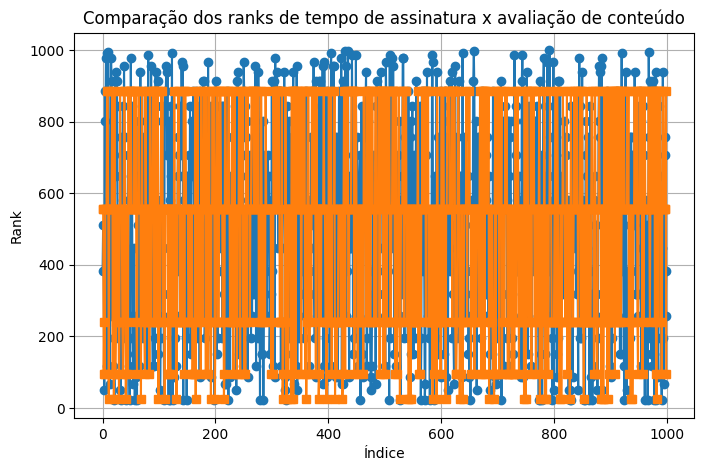

In [36]:
plt.figure(figsize=(8,5))
plt.plot(database['rank_tempo_assinatura'], label="Rank tempo de assinatura", marker='o')
plt.plot(database['rank_avaliacao_conteudo'], label="Rank avaliação conteúdo", marker='s')
plt.title('Comparação dos ranks de tempo de assinatura x avaliação de conteúdo')
plt.xlabel('Índice')
plt.ylabel('Rank')
plt.grid(True)
plt.show

In [37]:


# Exemplo de dados agregados por mês
dados = {
    'mes': ['Jan', 'Fev', 'Mar', 'Abr', 'Mai'],
    'vendas': [1200, 1500, 1300, 1800, 1700]
}

df = pd.DataFrame(dados)

# Calcula a variação relativa (% de crescimento ou queda)
df['var_pct'] = df['vendas'].pct_change() * 100  # variação percentual
df['var_pct_str'] = df['var_pct'].apply(lambda x: f'{x:.1f}%' if pd.notnull(x) else '')

# Gráfico de barras com valores absolutos no meio da barra
fig = px.bar(df, x='mes', y='vendas', text='vendas',
             title='Vendas por Mês com Variação Percentual')

# Ajusta os rótulos das barras para o centro
fig.update_traces(textposition='inside', selector=dict(type='bar'))

# Adiciona a linha com os valores percentuais
fig.add_scatter(
    x=df['mes'],
    y=df['vendas'],
    mode='lines+markers+text',
    name='Variação %',
    line=dict(color='black', dash='dot'),
    marker=dict(size=8),
    text=df['var_pct_str'],
    textposition='top center'
)

# Layout geral
fig.update_layout(
    yaxis_title='Total de Vendas',
    xaxis_title='Mês',
    hovermode='x unified'
)

# Abre no navegador
fig.show()